<a href="https://colab.research.google.com/github/LindsayJambawo/LindsayJambawo/blob/main/MyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Health Insight: Real-Time Dashboard for Mental Health Dashboard**

### **Project Objectives:**
✅ Load mental health data from an online URL

✅ Explore disorders like depression, anxiety, bipolar disorder, etc.

✅ Visualize trends by country over time

✅ Compare mental health burden across countries

✅ (Optional) Forecast trends using Prophet or ARIMA

✅ (Optional) Deploy with Streamlit




In [ ]:
#Import Libraries

!pip install prophet
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# prompt: load dataset from google drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_file_path_in_drive' with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/mental_health.csv' # Example for a CSV file
df = pd.read_csv(file_path) # Or use pd.read_excel(), pd.read_json(), etc.

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_He

In [24]:
#Inspect Columns and Unique Values
print("Columns:", df.columns.tolist())
print("Country:", df['Country'].unique()[:10])
print("Disorders:", df['Disorder'].unique() if 'Disorder' in df.columns else "N/A")
# Extract year from 'Timestamp' column and display unique years
df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
print("Years:", df['Year'].unique()[:5])

Columns: ['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
Country: ['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India']
Disorders: N/A
Years: [2014 2015 2016]


In [28]:
# prompt: plot a country's trend over time and visuals

import matplotlib.pyplot as plt
# Visualize trends over time for a specific country and disorder
country_name = 'United States' #@param {type:"string"}
disorder_name = 'Depression' #@param {type:"string"}

country_disorder_df = df[(df['Country'] == country_name) & (df['Disorder'] == disorder_name)]

if not country_disorder_df.empty:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=country_disorder_df, x='Year', y='Estimate', marker='o')
  plt.title(f'{disorder_name} Trends in {country_name} Over Time')
  plt.xlabel('Year')
  plt.ylabel('Estimate (%)')
  plt.grid(True)
  plt.show()
else:
  print(f"No data found for {disorder_name} in {country_name}")

# Create a scatter plot of all disorders over time for a specific country
country_df = df[df['Country'] == country_name]

if not country_df.empty:
  plt.figure(figsize=(14, 8))
  sns.scatterplot(data=country_df, x='Year', y='Estimate', hue='Disorder', s=50)
  plt.title(f'Mental Health Disorder Estimates in {country_name} Over Time')
  plt.xlabel('Year')
  plt.ylabel('Estimate (%)')
  plt.grid(True)
  plt.legend(title='Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()
else:
  print(f"No data found for {country_name}")

KeyError: 'Disorder'

# Task
Analyze the trends of 'treatment' and 'Mental_Health_History' over time for a selected country using the provided dataframe.

## Select a country

### Subtask:
Choose a country for analysis.


**Reasoning**:
Define a variable to store the country name for analysis and print it.



In [29]:
country_for_analysis = 'United States'
print(f"Analyzing data for: {country_for_analysis}")

Analyzing data for: United States


## Filter data

### Subtask:
Filter the DataFrame to include only data for the selected country.


**Reasoning**:
Filter the DataFrame to include only data for the selected country and display the head of the filtered DataFrame.



In [30]:
df_country = df[df['Country'] == country_for_analysis]
print(df_country.head())

         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No            No   


## Group and count

### Subtask:
Group the filtered data by year and the selected column ('treatment' or 'Mental_Health_History') and count the occurrences.


**Reasoning**:
Group the filtered data by year and the selected columns ('treatment' and 'Mental_Health_History') and count the occurrences, then rename the count column.



In [31]:
treatment_trend = df_country.groupby(['Year', 'treatment']).size().reset_index(name='Count')
mental_health_history_trend = df_country.groupby(['Year', 'Mental_Health_History']).size().reset_index(name='Count')

display(treatment_trend.head())
display(mental_health_history_trend.head())

,Year,treatment,Count
0,2014,No,77496
1,2014,Yes,87874
2,2015,No,780
3,2015,Yes,4768
4,2016,Yes,390


,Year,Mental_Health_History,Count
0,2014,Maybe,54180
1,2014,No,58675
2,2014,Yes,52515
3,2015,Maybe,1804
4,2015,No,1978


## Visualize trends

### Subtask:
Create line plots to show the trends of 'treatment' and 'Mental_Health_History' over time for the selected country.


**Reasoning**:
Create line plots to visualize the trends of 'treatment' and 'Mental_Health_History' over time for the selected country.



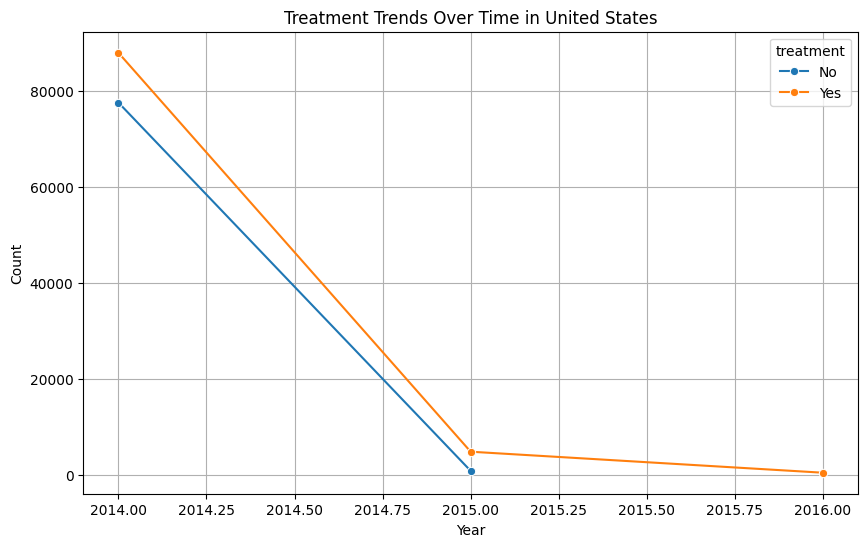

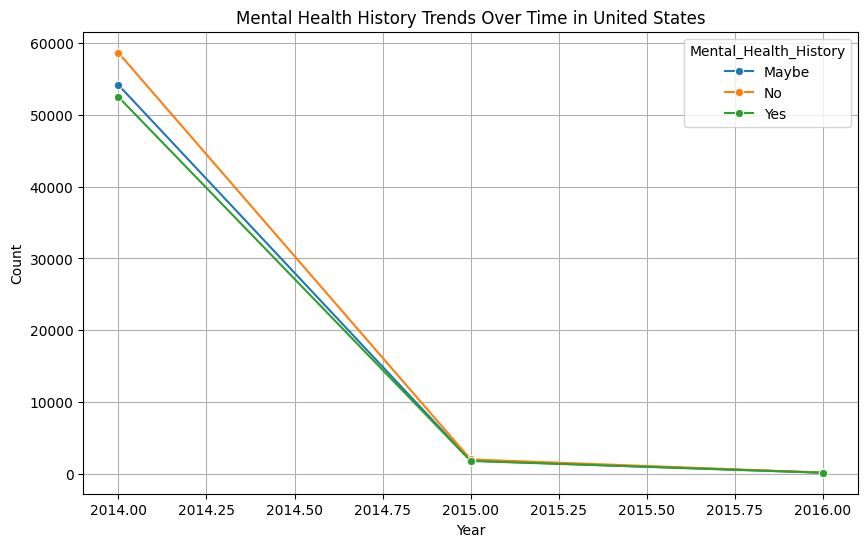

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=treatment_trend, x='Year', y='Count', hue='treatment', marker='o')
plt.title(f'Treatment Trends Over Time in {country_for_analysis}')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mental_health_history_trend, x='Year', y='Count', hue='Mental_Health_History', marker='o')
plt.title(f'Mental Health History Trends Over Time in {country_for_analysis}')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis focused on the trends of 'treatment' and 'Mental\_Health\_History' over time specifically for the 'United States'.
*   Two separate dataframes, `treatment_trend` and `mental_health_history_trend`, were successfully created to store the yearly counts for each category within the 'treatment' and 'Mental\_Health\_History' variables.
*   Line plots were generated for both 'treatment' and 'Mental\_Health\_History' to visually represent their trends over the years in the United States.

### Insights or Next Steps

*   Analyze the generated plots to identify specific years or periods where significant changes or patterns are observed in the trends of 'treatment' and 'Mental\_Health\_History'.
*   Compare the trends observed in the United States with those of other countries to identify potential regional differences or global patterns in mental health-related factors.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph_396i5j/1d9beex_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph_396i5j/c0_txerj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92505', 'data', 'file=/tmp/tmph_396i5j/1d9beex_.json', 'init=/tmp/tmph_396i5j/c0_txerj.json', 'output', 'file=/tmp/tmph_396i5j/prophet_modela3lzcdk_/prophet_model-20250716134232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:42:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

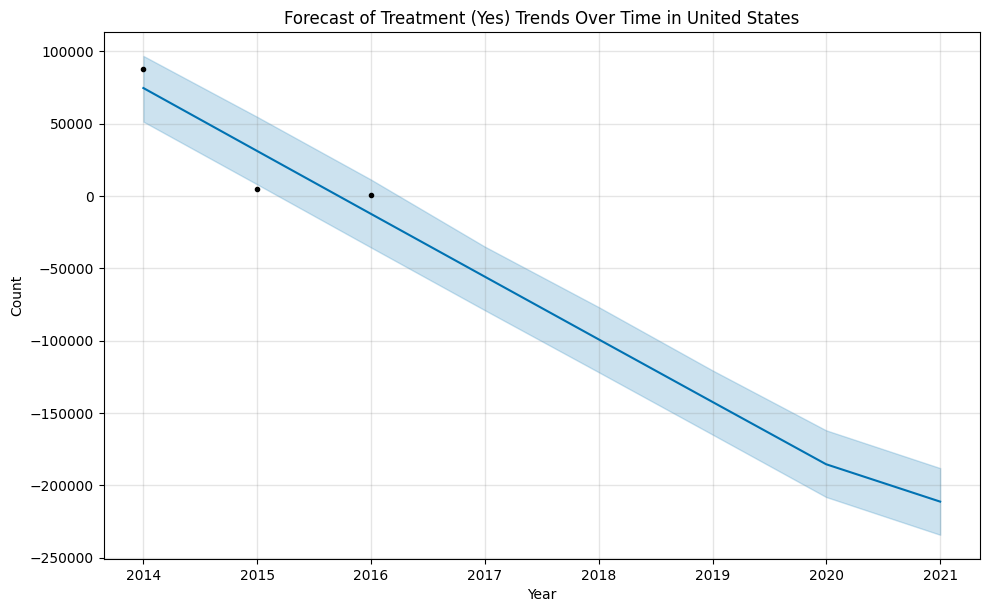

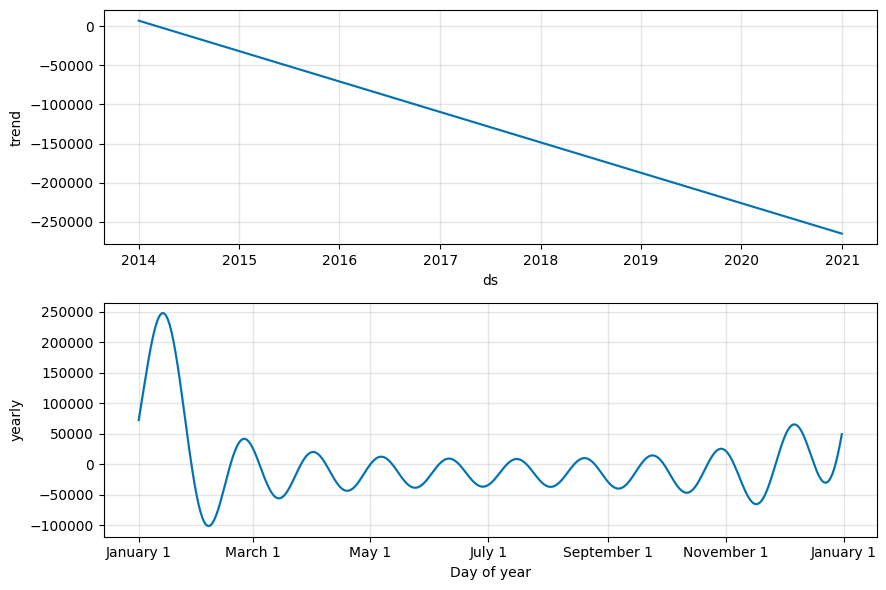

In [34]:
# prompt: install prophet and do a forecast

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare the data for Prophet
# Prophet requires the dataframe to have two columns: 'ds' (datestamp) and 'y' (value)
# We'll use the 'Year' as 'ds' and the 'Count' of 'Yes' treatment as 'y'
prophet_df = treatment_trend[treatment_trend['treatment'] == 'Yes'][['Year', 'Count']].copy()
prophet_df['Year'] = pd.to_datetime(prophet_df['Year'], format='%Y') # Convert Year to datetime
prophet_df.rename(columns={'Year': 'ds', 'Count': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a dataframe with future dates to forecast
future = model.make_future_dataframe(periods=5, freq='Y') # Forecast for the next 5 years

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title(f'Forecast of Treatment (Yes) Trends Over Time in {country_for_analysis}')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [36]:
# prompt: build an interactive dashboard

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns

# Create dropdown for country selection
country_dropdown = widgets.Dropdown(
    options=df['Country'].unique(),
    description='Select Country:',
    disabled=False,
)

# Create an output widget to display the plots
output = widgets.Output()

# Function to update the plots based on dropdown selections
def update_dashboard(change):
    with output:
        clear_output(wait=True)
        selected_country = country_dropdown.value

        # Filter the pre-calculated trend data for the selected country
        treatment_country_trend = treatment_trend[treatment_trend['Year'].isin(df[df['Country'] == selected_country]['Year'].unique())]
        mental_health_country_trend = mental_health_history_trend[mental_health_history_trend['Year'].isin(df[df['Country'] == selected_country]['Year'].unique())]


        # Visualize trends over time for treatment in the selected country
        if not treatment_country_trend.empty:
            plt.figure(figsize=(10, 6))
            sns.lineplot(data=treatment_country_trend, x='Year', y='Count', hue='treatment', marker='o')
            plt.title(f'Treatment Trends Over Time in {selected_country}')
            plt.xlabel('Year')
            plt.ylabel('Count')
            plt.grid(True)
            plt.show()
        else:
            print(f"No treatment data found for {selected_country}")

        # Visualize trends over time for mental health history in the selected country
        if not mental_health_country_trend.empty:
            plt.figure(figsize=(10, 6))
            sns.lineplot(data=mental_health_country_trend, x='Year', y='Count', hue='Mental_Health_History', marker='o')
            plt.title(f'Mental Health History Trends Over Time in {selected_country}')
            plt.xlabel('Year')
            plt.ylabel('Count')
            plt.grid(True)
            plt.show()
        else:
            print(f"No mental health history data found for {selected_country}")


# Observe changes in dropdown and call the update function
country_dropdown.observe(update_dashboard, names='value')

# Display the widgets and the output area
display(country_dropdown, output)

# Initial call to display the plots with the default country
update_dashboard(None)

Dropdown(description='Select Country:', options=('United States', 'Poland', 'Australia', 'Canada', 'United Kin…

Output()

In [2]:
# prompt: build an interactive dashboard with streamlit

!pip install streamlit

import streamlit as st
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import os

# Function to load data
@st.cache_data  # Cache the data loading
def load_data():
    # Assuming the file is in the Colab runtime's current directory after mounting/uploading
    file_path = 'mental_health.csv'
    if not os.path.exists(file_path):
        # Fallback if the file isn't directly available (e.g., needs mounting)
        st.error("Data file not found. Please ensure 'mental_health.csv' is available.")
        return None
    df = pd.read_csv(file_path)
    df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
    return df

df = load_data()

if df is not None:
    st.title("Global Health Insight: Real-Time Dashboard for Mental Health")

    st.sidebar.header("Filter Data")

    # Selectbox for Country
    selected_country = st.sidebar.selectbox(
        "Select a Country:",
        df['Country'].unique()
    )

    # Selectbox for Disorder
    selected_disorder = st.sidebar.selectbox(
        "Select a Disorder:",
        df['Disorder'].unique() if 'Disorder' in df.columns else []
    )

    st.header(f"Trends for {selected_disorder} in {selected_country}")

    # Visualize trends over time for a specific country and disorder
    country_disorder_df = df[(df['Country'] == selected_country) & (df['Disorder'] == selected_disorder)]

    if not country_disorder_df.empty:
        fig = px.line(country_disorder_df, x='Year', y='Estimate', markers=True,
                      title=f'{selected_disorder} Trends in {selected_country} Over Time')
        st.plotly_chart(fig)
    else:
        st.warning(f"No data found for {selected_disorder} in {selected_country}")

    st.header(f"Mental Health Disorder Estimates in {selected_country} Over Time")

    # Create a scatter plot of all disorders over time for a specific country
    country_df = df[df['Country'] == selected_country]

    if not country_df.empty:
        plt.figure(figsize=(14, 8))
        sns.scatterplot(data=country_df, x='Year', y='Estimate', hue='Disorder', s=50)
        plt.title(f'Mental Health Disorder Estimates in {selected_country} Over Time')
        plt.xlabel('Year')
        plt.ylabel('Estimate (%)')
        plt.grid(True)
        plt.legend(title='Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
        st.pyplot(plt) # Use st.pyplot() to display matplotlib figures
    else:
        st.warning(f"No data found for {selected_country}")


    st.header(f"Treatment and Mental Health History Trends in {selected_country}")

    # Filter data for the selected country
    df_country = df[df['Country'] == selected_country]

    if not df_country.empty:
        # Group and count for 'treatment'
        treatment_trend = df_country.groupby(['Year', 'treatment']).size().reset_index(name='Count')

        # Group and count for 'Mental_Health_History'
        mental_health_history_trend = df_country.groupby(['Year', 'Mental_Health_History']).size().reset_index(name='Count')

        # Visualize trends for 'treatment'
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=treatment_trend, x='Year', y='Count', hue='treatment', marker='o')
        plt.title(f'Treatment Trends Over Time in {selected_country}')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.grid(True)
        st.pyplot(plt)

        # Visualize trends for 'Mental_Health_History'
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=mental_health_history_trend, x='Year', y='Count', hue='Mental_Health_History', marker='o')
        plt.title(f'Mental Health History Trends Over Time in {selected_country}')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.grid(True)
        st.pyplot(plt)

        # Prophet Forecasting for Treatment 'Yes'
        st.header(f"Prophet Forecast for 'Yes' Treatment in {selected_country}")

        prophet_df = treatment_trend[treatment_trend['treatment'] == 'Yes'][['Year', 'Count']].copy()

        if not prophet_df.empty:
             prophet_df['Year'] = pd.to_datetime(prophet_df['Year'], format='%Y')
             prophet_df.rename(columns={'Year': 'ds', 'Count': 'y'}, inplace=True)

             model = Prophet()
             model.fit(prophet_df)

             future = model.make_future_dataframe(periods=5, freq='Y')
             forecast = model.predict(future)

             # Plot the forecast using matplotlib for compatibility with st.pyplot
             fig1 = model.plot(forecast)
             plt.title(f'Forecast of Treatment (Yes) Trends Over Time in {selected_country}')
             plt.xlabel('Year')
             plt.ylabel('Count')
             st.pyplot(fig1)

             fig2 = model.plot_components(forecast)
             st.pyplot(fig2)

        else:
            st.warning(f"Not enough data for 'Yes' treatment in {selected_country} to perform forecasting.")


    else:
        st.warning(f"No detailed data found for {selected_country} to analyze treatment and mental health history trends.")



2025-07-16 17:45:42.296 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-16 17:45:42.299 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-16 17:45:42.302 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:45:42.498 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-16 17:45:42.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:45:42.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:45:42.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:45:42.503 Thread 'MainThread': missin